In [7]:
%run setup.py

# Catalog meeting talk 2022-07-20

## Outline

* Review design
  * FT1, FT2 extracted to compact dataset, 3.2GB. Currently 257M photons above (100,316) Gev for (Front, Back)
   positions encoded as 4-byte HEALPix index, energy as 4/decade band index.
  * Weight tables for all 4FGL-DR3 sources determined (by pointlike, sadly)
  * Implements Kerr weighted likelihood analysis
  * Fast: After caching data for source, 5-10 min, create light curves for any binning in seconds. 
  
* What's new since [Sept 2021 presentation](https://tburnett.github.io/wtlike/presentation)
  * GDrive with Goggle colab: data and code example-- [setup.ipynb](https://colab.research.google.com/drive/15ZX9S5gU0-Mqbhof8WdfPVdb_7gHoObF#scrollTo=Bw0SId4r4mpO)
  * HEALPix projected images
      * all-sky plots -- extract in ~1min
      * ZEA plot for any region in seconds
  * Weight correction:
  * Kerr periodogram 
      * Bright pulsars [ipynb](http://localhost:8888/lab/tree/wtlike/tmp/pulsar_variability/survey.ipynb)
      * Check the [six periodic blazars](http://localhost:8888/lab/tree/wtlike/tmp/agn_variability/six_blazars.ipynb)
  * Comparisons with LCR ([Sept 2021 presentation](https://confluence.slac.stanford.edu/display/~burnett/wtlike-LCR+comparisons) )
      * The good [PKS 0208-512, 3C 273, 4FGL J1555.7+1111]
      * The bad [Cyg X-3, PSR J2021+4026]
* Future Plans
  * How believable are the Six?
  * is the LCR (and perhaps gtlike) bad at Cygnus?
  * All-sky variability (I have a summer student)


## Review

### [Kerr](https://arxiv.org/pdf/1910.00140.pdf)  time-binned likelihood using weights<br>

#### The Kerr likelihood formula  

For each cell with a set of photons with weights $w$, the log likelihood as a function of $\alpha$  and $\beta$ is

$$ \displaystyle\log\mathcal{L}(\alpha,\beta\ |\ w)\ = \sum_{w}  \log \big( 1 + \alpha\ w + \beta\ (1-w) \big) - (\alpha\ S + \beta\ B) $$

where  $\alpha$ and $\beta$ are the excess signal and background fractions and $S$ and $B$ are
the expected numbers of signal and background counts for the cell, determined from the full data set and relative exposure for the cell.


### Dataflow diagram
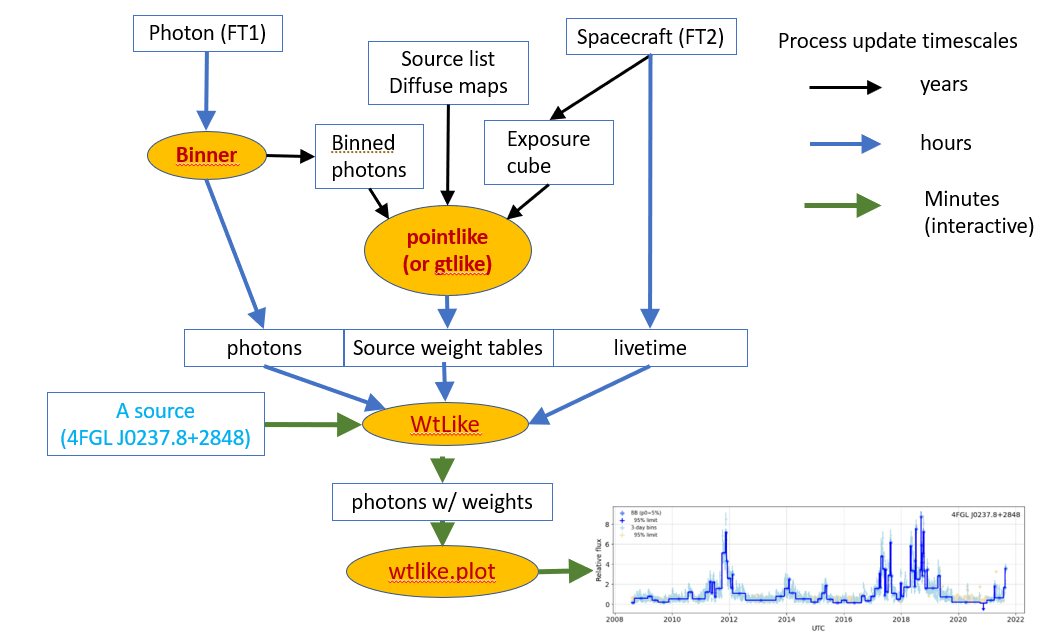

### Two special ingredients make it fast and flexible:

* __The 3-GB photon data cube__:

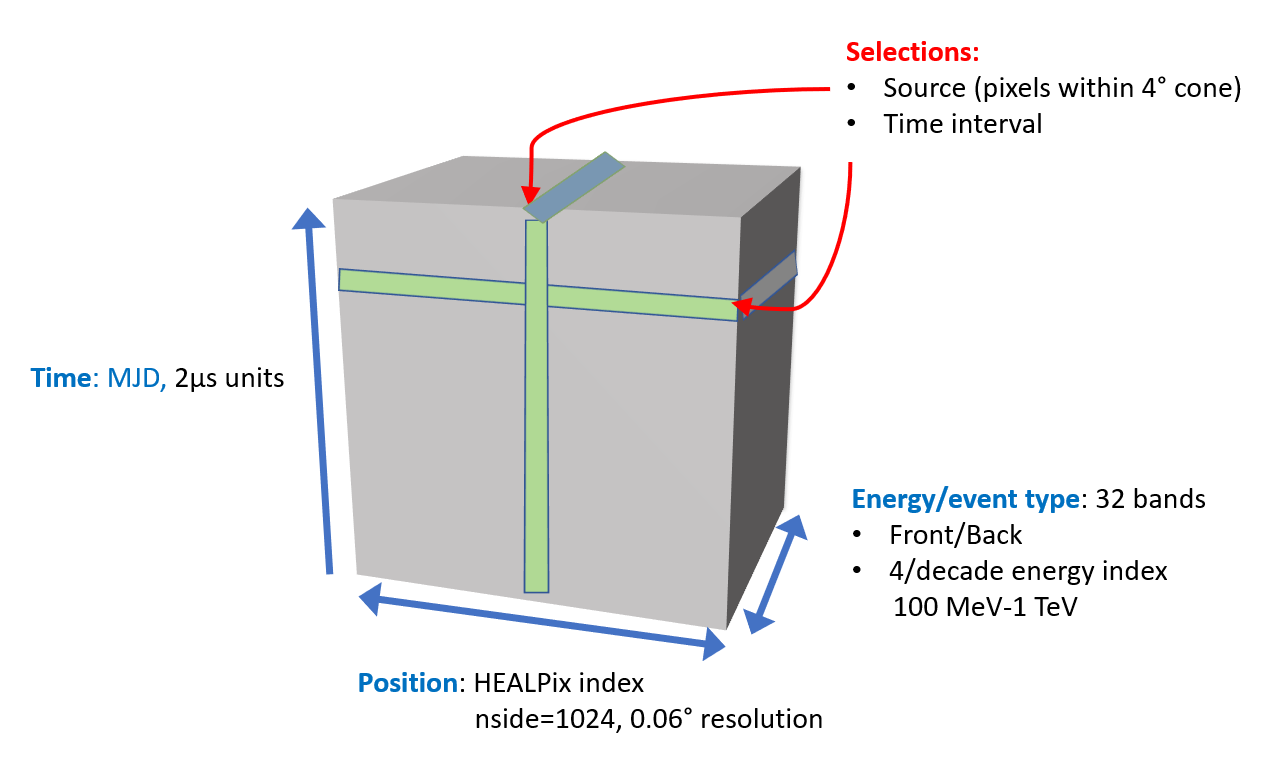

* __Photon weight table__<br>
Based on 4FGL-DR3 12-year all-sky model<br>
Time-depended evaluation separated from all-sky <br> 
All 4FGL-DR3 sources (using pointlike) included

## What's new since [Sept 2021 presentation](https://tburnett.github.io/wtlike/presentation)

### Available on Goggle colab
[Data and and a demo](https://colab.research.google.com/drive/1Dy29VRE3M28W_uMJruDxrBElFpyg0Iyl)

### HEALpix projections

Extract projection over all time in ~1 min.
Following have E>1 GeV. 

### All-sky: AIT
<figure style="margin-left: 5%" title="Figure 1">   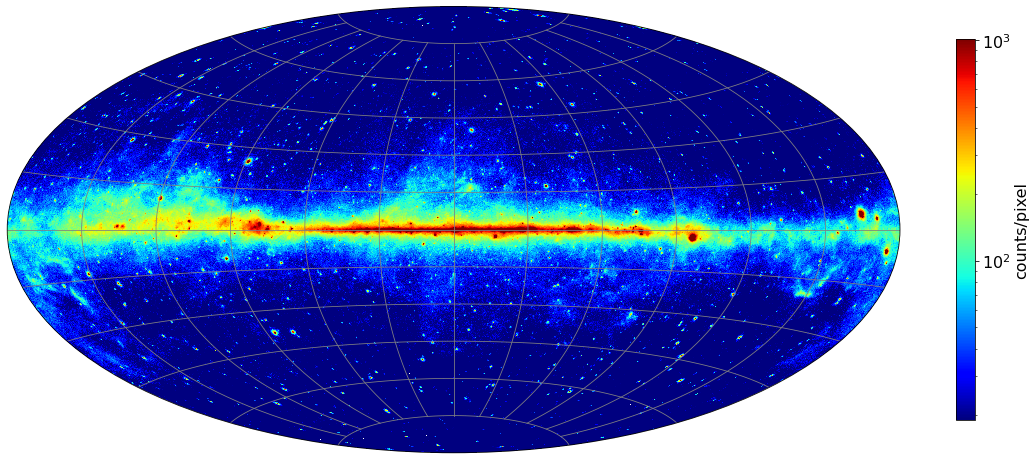 </figure>

### A region: ZEA
<figure style="margin-left: 5%" title="Figure 2">   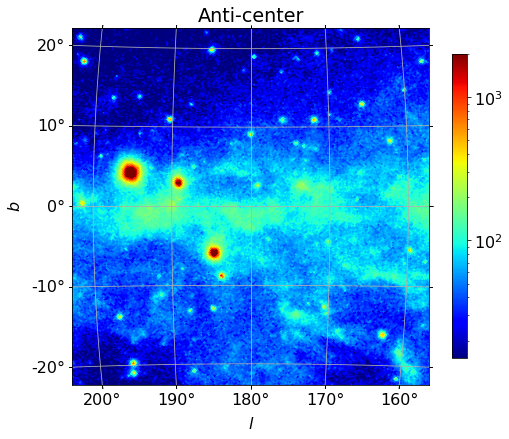 </figure>


In [15]:
hpmap_demo()

## Weight correction

# Weight correction factor
For a presumably constant source $S_1$ with a variable neighbor $S_2$, I've
[derived](https://tburnett.github.io/wtlike/sources.html#Accounting-for-variations-from-neighboring-sources) the following:

$$w'_1 = \frac{w_1}{1+\alpha_2\ w_2}\ \ ,   $$
where  $w_1$ and $w_2$ are weights for a common pixel/band, and $\alpha_2$ is the source flux factor for $S_2$. 

We will test this, with $S_1$ as the pulsar PSR J0007+7303 and $S_2$ the AGN 4FGL J0019.6+7327. 
The separation is 1 deg.

<figure style="margin-left: 5%" title="Figure 1">   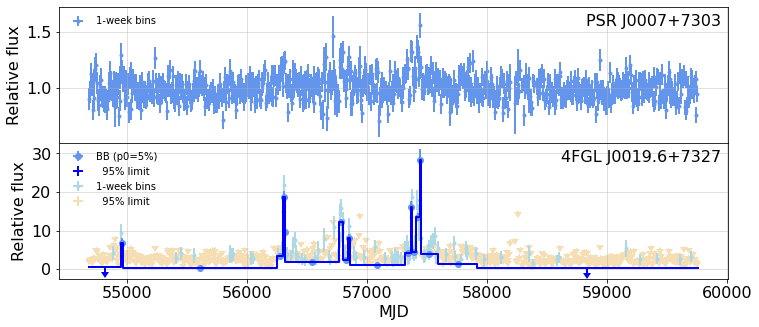  <figcaption><b>Figure 1</b>. Upper plot: the pulsar PSR J0007+7303; lower plot: Bayesian block output of the variable source.</figcaption></figure>


### Demonstrate the effect of applying the correction.

#### Before:




#### Long-term variability for PSR J0007+7303
<figure style="margin-left: 5%" title="Figure 1">   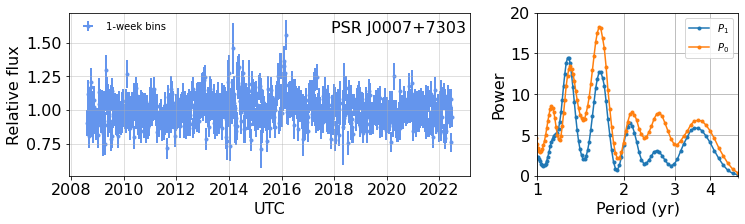 </figure>




#### After:

Applied correction to the pulsar PSR J0007+7303 from the nearby blazar 4FGL J0019.6+7327



CellData.rebin: Bin photon data into 725 1-week bins from 54683.0 to 59758.0
LightCurve: select 715 cells for fitting with e>35 & n>2


#### Long-term variability for PSR J0007+7303
<figure style="margin-left: 5%" title="Figure 1">   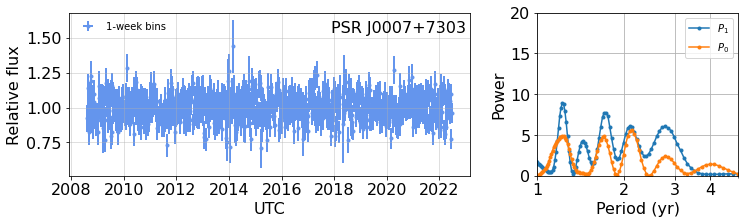 </figure>


So both $P_0$ and $P_1$ are now smaller, and the relative size seems to be reversed.
    


In [58]:
%run code/weight_correction
wc_demo()

## Kerr Periodograms for pulsars

### LIght curves and systematic check
    
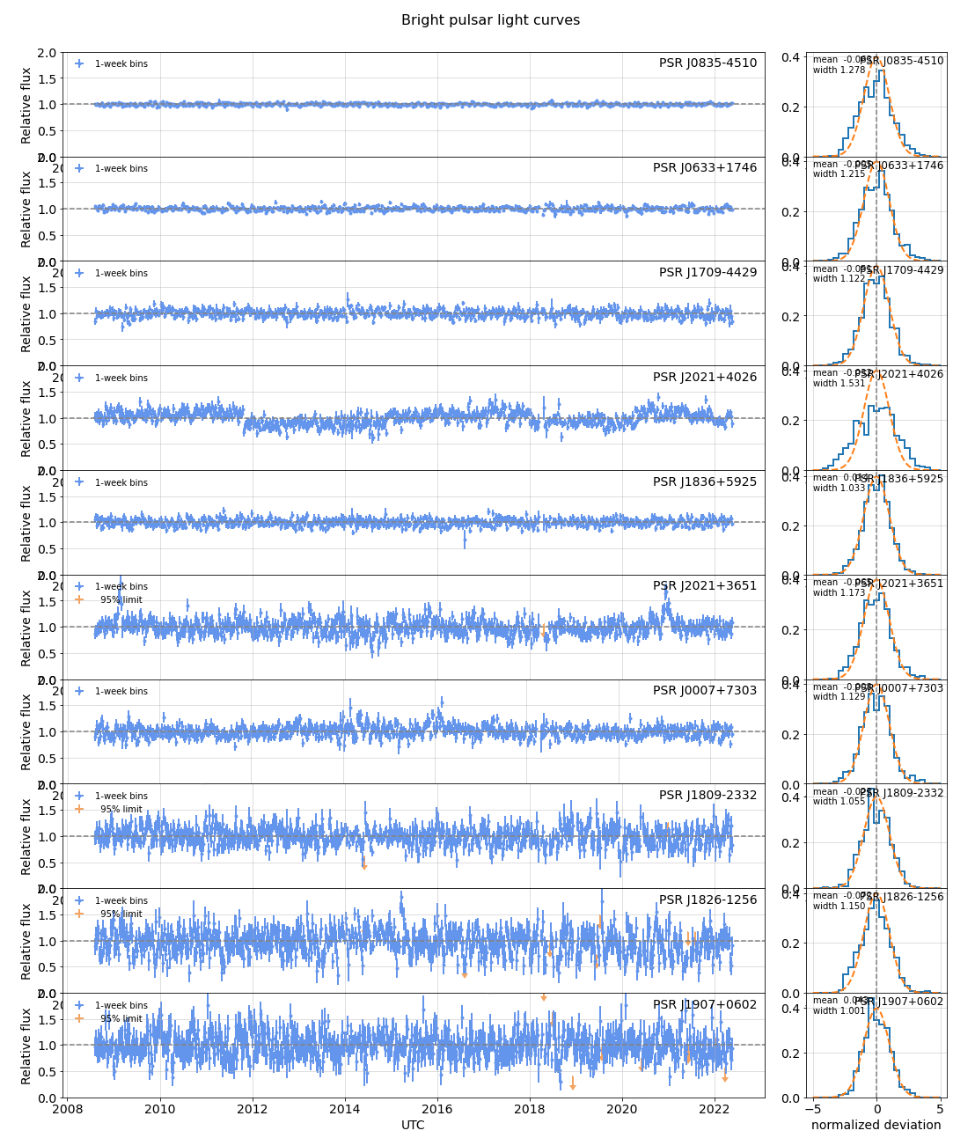 


### Baysean Block analysis

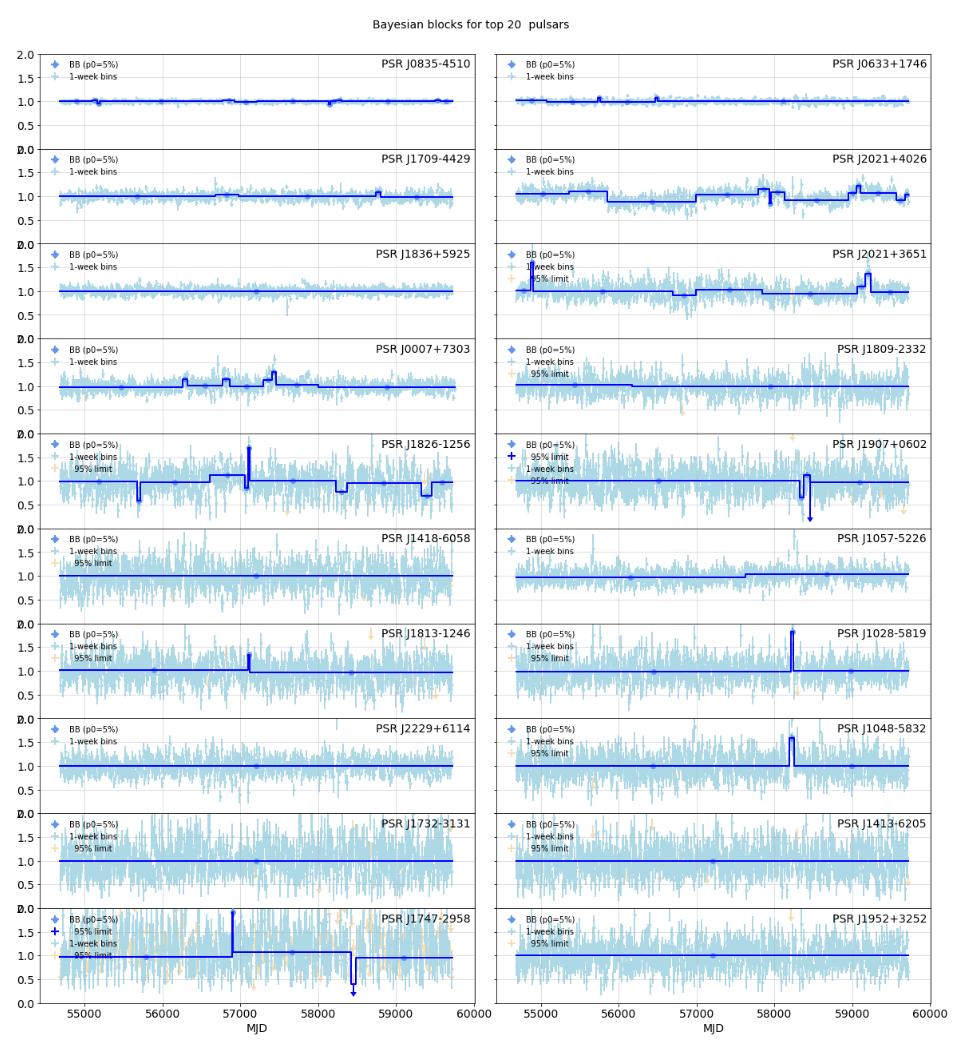

    
### Periodograms

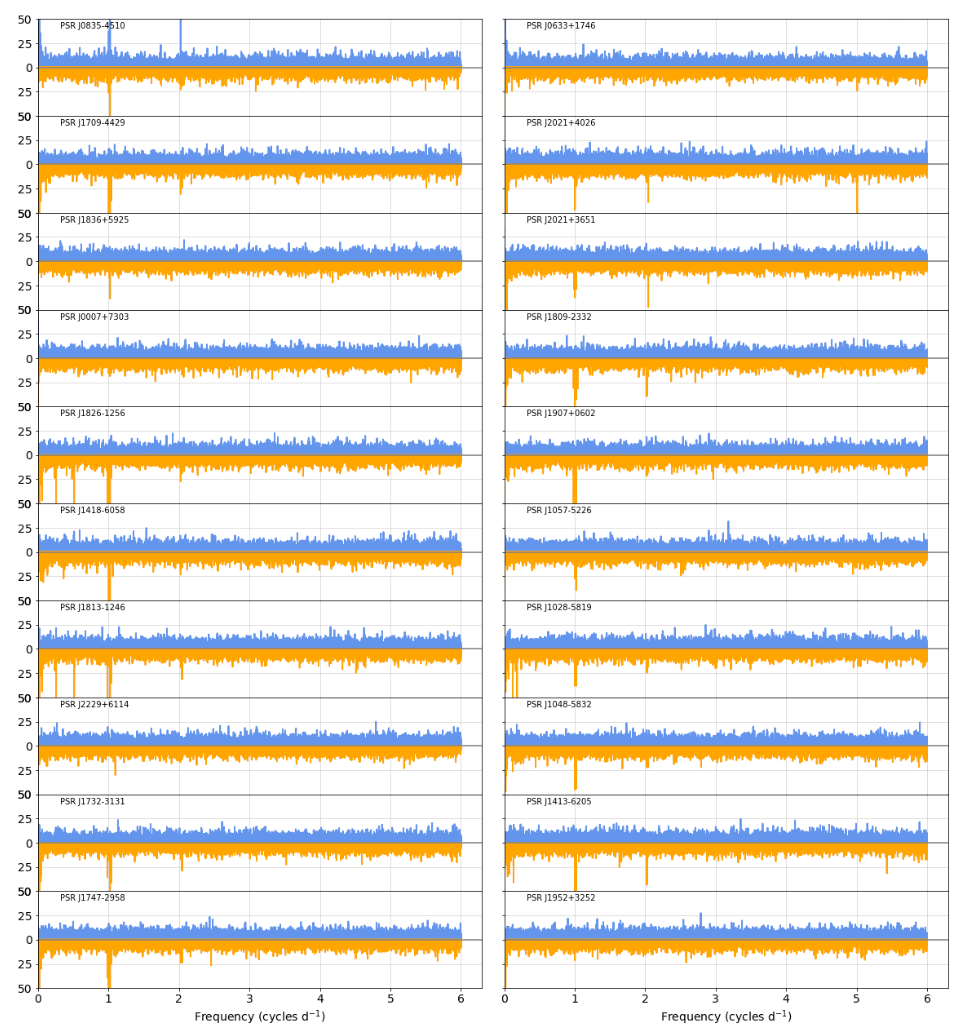

### Low Frequency power spectra

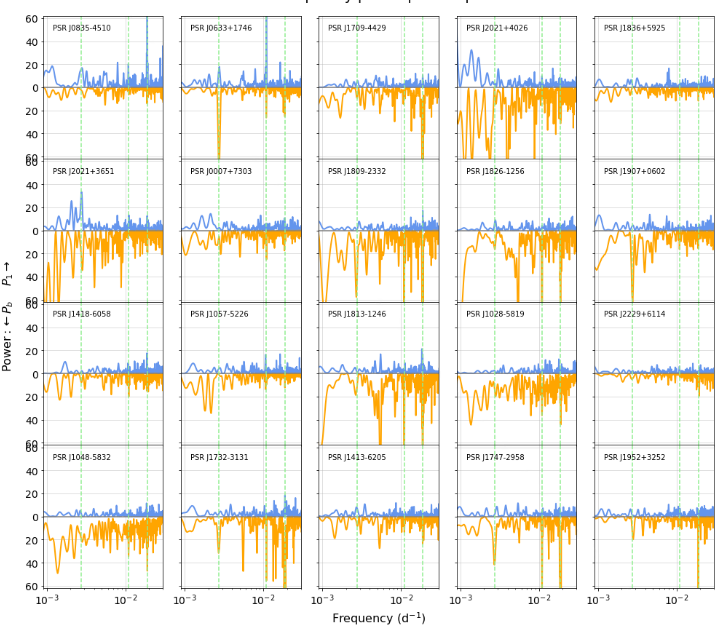

## Examine the Six periodic blazars


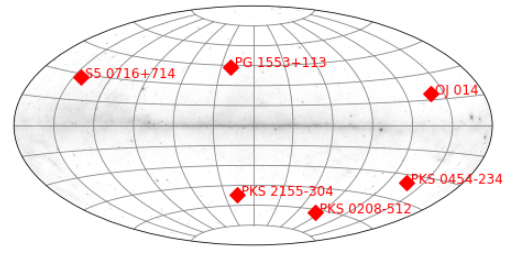

### Low-frequency Kerr periodograms
    
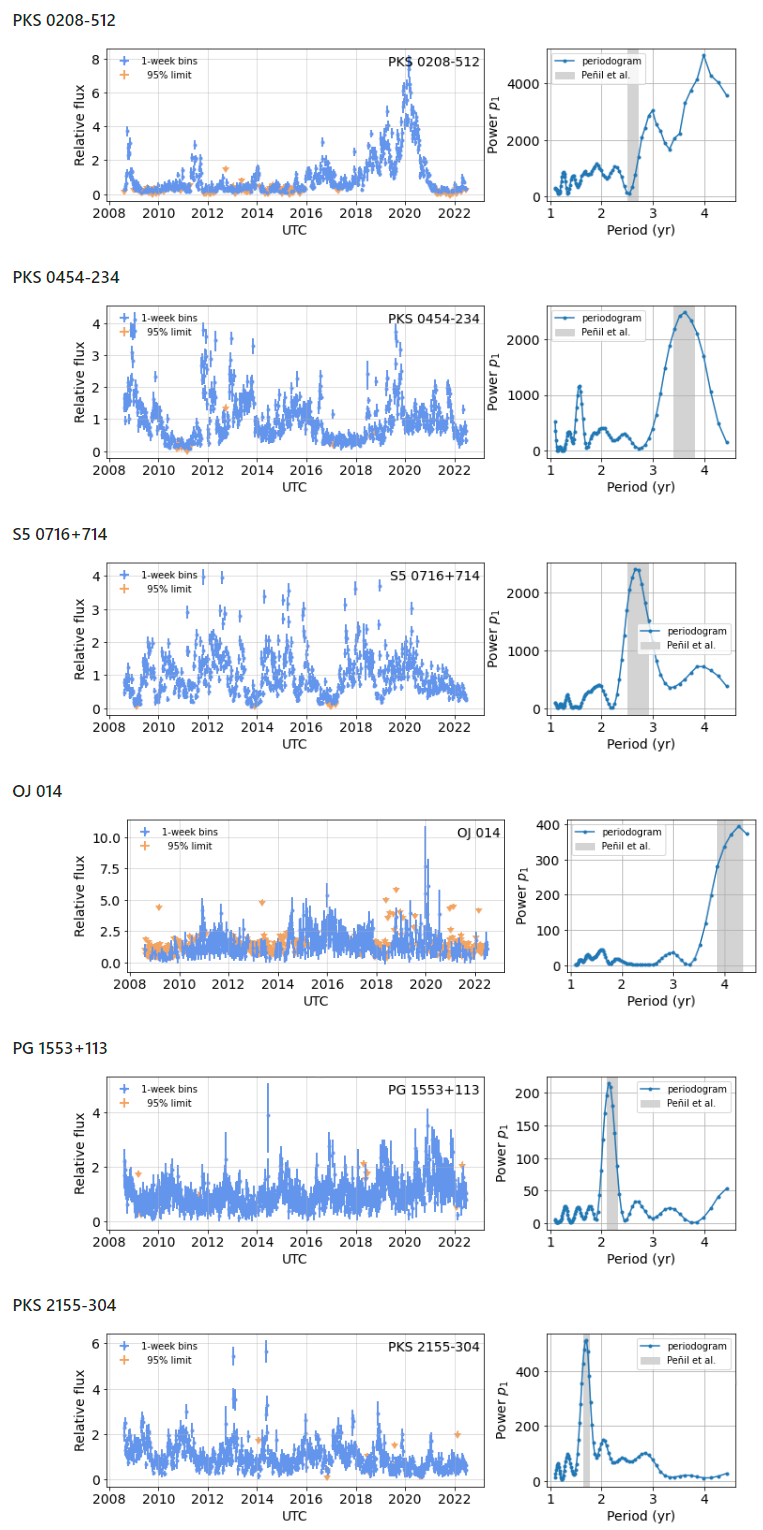


### Plots of $P_1$ and $P_b$ 
    
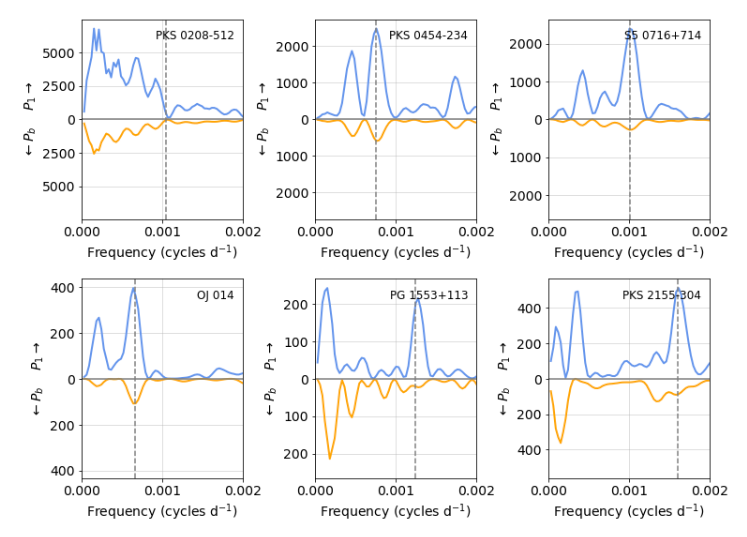
    


## LCR comparisons
Previous: ([Sept 2021 presentation](https://confluence.slac.stanford.edu/display/~burnett/wtlike-LCR+comparisons) )


#### 3C 273: wtlike vs. LCR
<figure style="margin-left: 5%" title="Figure 1">   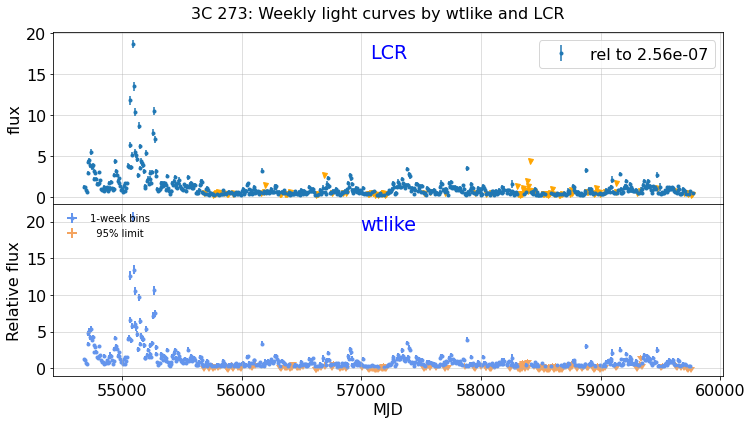 </figure>
<figure style="margin-left: 5%" title="Figure 2">   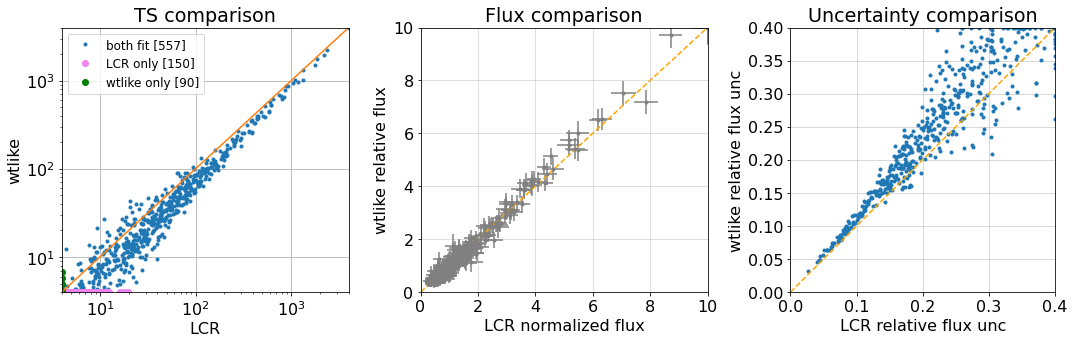 </figure>


#### PKS 0208-512: wtlike vs. LCR
<figure style="margin-left: 5%" title="Figure 1">   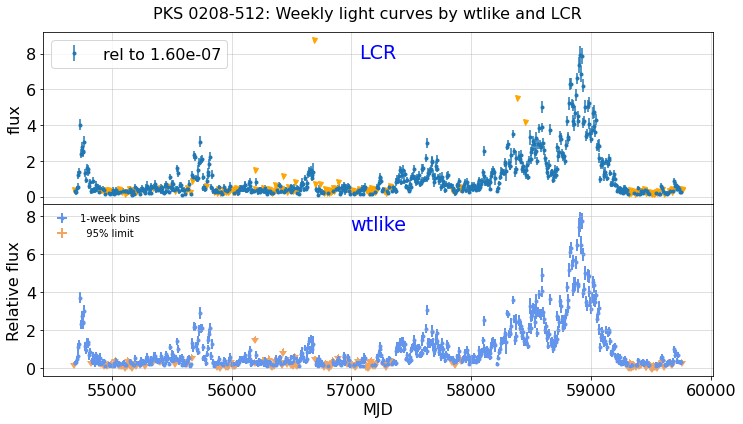 </figure>
<figure style="margin-left: 5%" title="Figure 2">   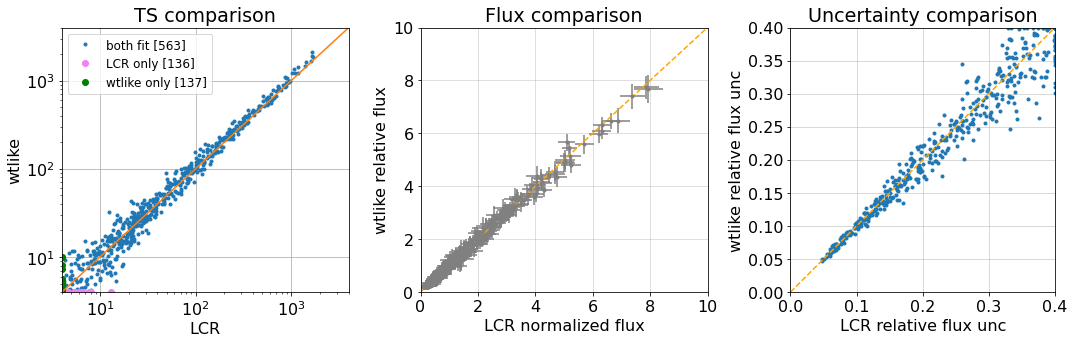 </figure>


#### 4FGL J1555.7+1111: wtlike vs. LCR
<figure style="margin-left: 5%" title="Figure 1">   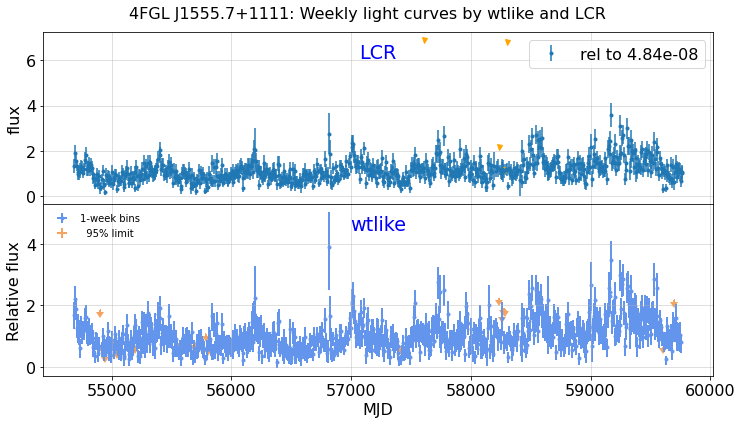 </figure>
<figure style="margin-left: 5%" title="Figure 2">   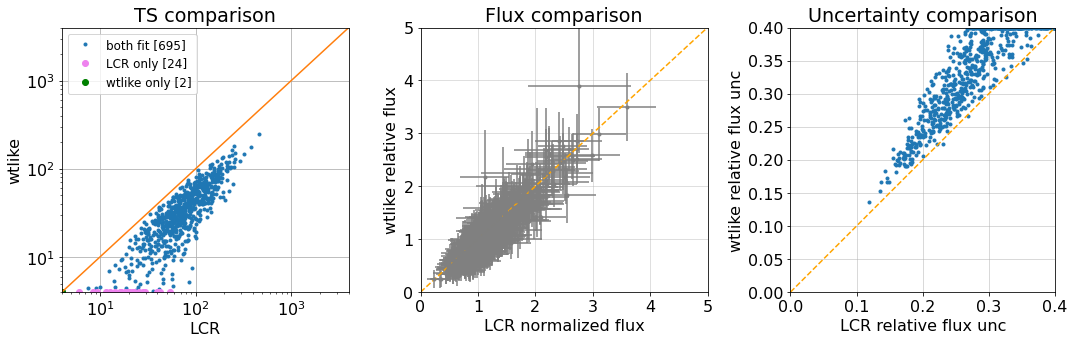 </figure>


#### PSR J2021+4026: wtlike vs. LCR
<figure style="margin-left: 5%" title="Figure 1">   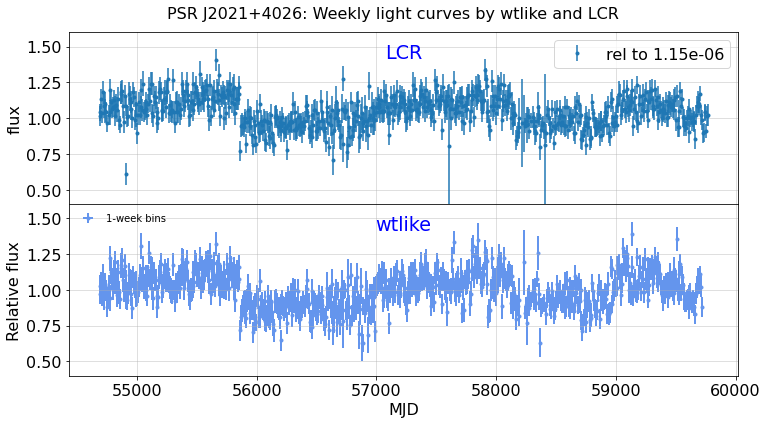 </figure>
<figure style="margin-left: 5%" title="Figure 2">   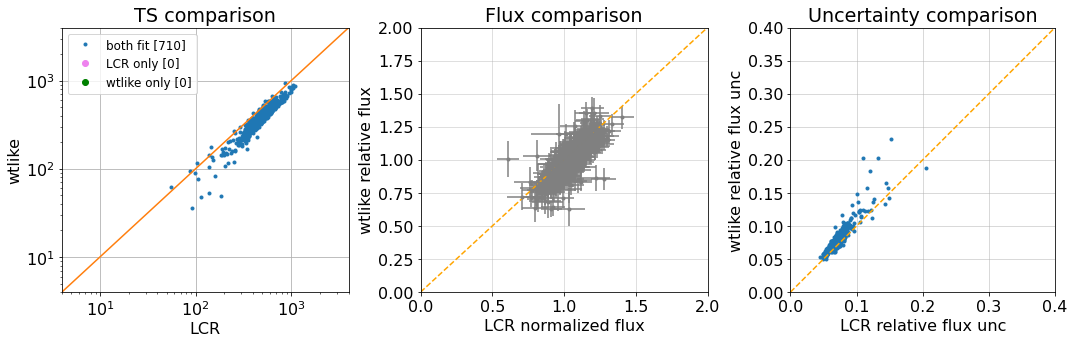 </figure>


#### Cyg X-3: wtlike vs. LCR
<figure style="margin-left: 5%" title="Figure 1">   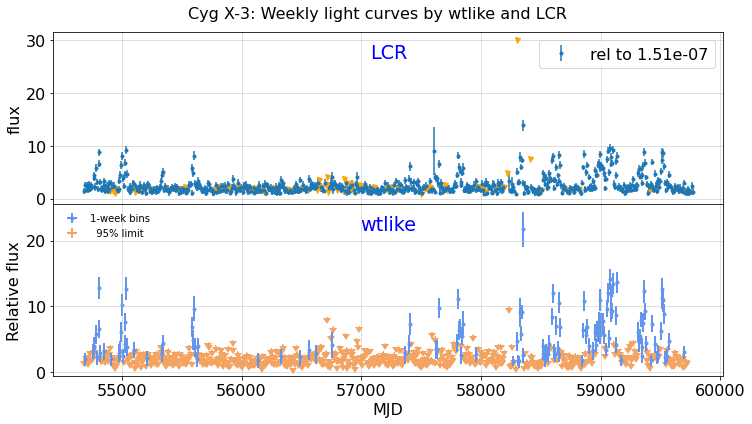 </figure>
<figure style="margin-left: 5%" title="Figure 2">   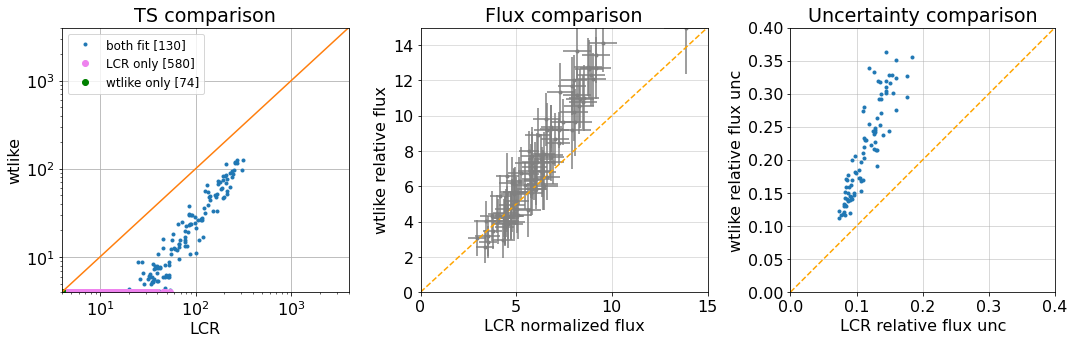 </figure>


In [72]:
%run code/lcr.py
lcr_all()



### Cygnus map

Note that Cyg X-3 is several degrees away. None of the other sources are in LCR
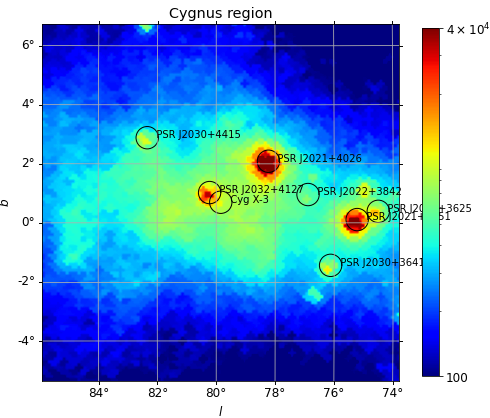    
